In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import math
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from scipy import stats
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# import the train file from download
train = pd.read_csv("./sample_data/train.csv")
test = pd.read_csv("./sample_data/test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
combined = train.append(test)
combined

<ipython-input-28-ac51fd502930>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = train.append(test)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
master_mean = combined.loc[combined['Name'].str.contains('Master'), 'Age'].mean()
master_mean

5.482641509433963

In [ ]:
miss_mean_child = combined.loc[combined['Name'].str.contains('Miss') & (combined['Parch'] > 1), 'Age'].mean()
miss_mean_child

13.643333333333334

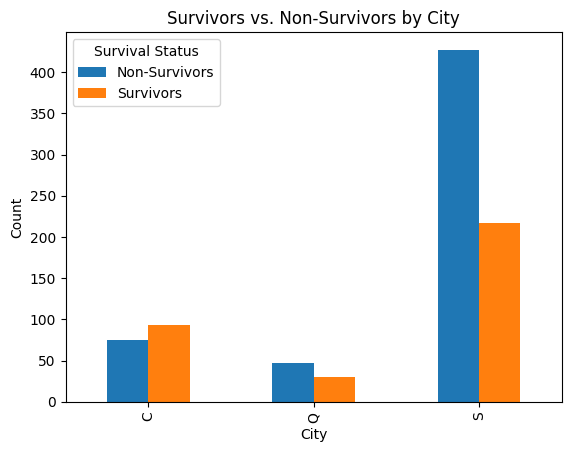

In [ ]:
# Group the data by 'City' and 'Survived', and count the occurrences
city_survival_counts = train.groupby(['Embarked', 'Survived']).size().unstack().fillna(0)

# Create a stacked bar plot
city_survival_counts.plot(kind='bar')
plt.title('Survivors vs. Non-Survivors by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(['Non-Survivors', 'Survivors'], title='Survival Status')
plt.show()

<ipython-input-32-2accbb7126cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Age_group['Age Group'] = pd.cut(Age_group['Age'], bins=[0, 5, 15, 22, 30, 40, 50, 60, 70, 100], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])


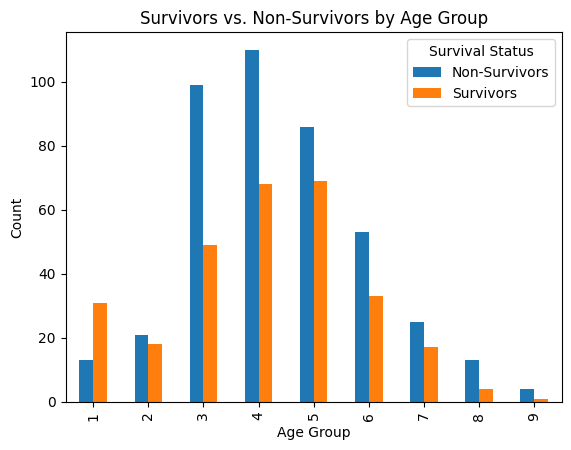

In [ ]:
Age_group = train.dropna(subset=["Age"])
Age_group['Age Group'] = pd.cut(Age_group['Age'], bins=[0, 5, 15, 22, 30, 40, 50, 60, 70, 100], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
Age_group

# Group the data by 'City' and 'Survived', and count the occurrences
age_survival_counts = Age_group.groupby(['Age Group', 'Survived']).size().unstack().fillna(0)

# Create a stacked bar plot
age_survival_counts.plot(kind='bar')
plt.title('Survivors vs. Non-Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Non-Survivors', 'Survivors'], title='Survival Status')
plt.show()

In [ ]:
#Split for X and Y for train and test set
X_train = train.drop(columns = ['Survived'])
Y_train = train['Survived']
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#I'm going to fill in missing age values dependent on the age and class you are in by the mean.
first_class_female = combined[(combined['Pclass'] == 1) & (combined['Sex'] == 'female')].dropna()
first_class_female_mean = math.floor(first_class_female['Age'].mean())

second_class_female = combined[(combined['Pclass'] == 2) & (combined['Sex'] == 'female')].dropna()
second_class_female_mean = math.floor(second_class_female['Age'].mean())

third_class_female = combined[(combined['Pclass'] == 3) & (combined['Sex'] == 'female')].dropna()
third_class_female_mean = math.floor(third_class_female['Age'].mean())

first_class_male = combined[(combined['Pclass'] == 1) & (combined['Sex'] == 'male')].dropna()
first_class_male_mean = math.floor(first_class_male['Age'].median())

second_class_male = combined[(combined['Pclass'] == 2) & (combined['Sex'] == 'male')].dropna()
second_class_male_mean = math.floor(second_class_male['Age'].mean())

third_class_male = combined[(combined['Pclass'] == 3) & (combined['Sex'] == 'male')].dropna()
third_class_male_mean = math.floor(third_class_male['Age'].mean())

X_train.loc[X_train['Name'].str.contains('Master') & pd.isna(X_train['Age']), 'Age'] = math.floor(master_mean)
X_train.loc[X_train['Name'].str.contains('Miss') & (X_train['Parch'] > 1) & pd.isna(X_train['Age']), 'Age'] = math.floor(second_class_female_mean)

X_train.loc[(X_train['Pclass'] == 1) & (X_train['Sex'] == 'female') & pd.isna(X_train['Age']), 'Age'] = first_class_female_mean
X_train.loc[(X_train['Pclass'] == 2) & (X_train['Sex'] == 'female') & pd.isna(X_train['Age']), 'Age'] = second_class_female_mean
X_train.loc[(X_train['Pclass'] == 3) & (X_train['Sex'] == 'female') & pd.isna(X_train['Age']), 'Age'] = third_class_female_mean

X_train.loc[(X_train['Pclass'] == 1) & (X_train['Sex'] == 'male') & pd.isna(X_train['Age']), 'Age'] = first_class_male_mean
X_train.loc[(X_train['Pclass'] == 2) & (X_train['Sex'] == 'male') & pd.isna(X_train['Age']), 'Age'] = second_class_male_mean
X_train.loc[(X_train['Pclass'] == 3) & (X_train['Sex'] == 'male') & pd.isna(X_train['Age']), 'Age'] = third_class_male_mean
X_train['Age Group'] = pd.cut(X_train['Age'], bins=[0, 5, 15, 22, 30, 40, 50, 60, 70, 100], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4


In [ ]:
# Predicting Model Build Up
X_train_pred = X_train.loc[:, ['Pclass', 'Sex', 'Fare', 'Embarked', 'Age']]
Y_train_pred = train['Survived']
X_train_pred = pd.get_dummies(X_train_pred, columns = ['Sex', 'Embarked', 'Pclass'], dtype = int)
#median_age_train = X_train_pred["Age"].median()
#X_train_pred["Age"].fillna(median_age_train, inplace = True)
X_train_pred = X_train_pred.fillna(0)

scalar = StandardScaler()
Agescalar = MinMaxScaler()
X_train_pred['Fare'] = scalar.fit_transform(np.array(X_train_pred['Fare']).reshape(-1, 1))
X_train_pred['Age'] = Agescalar.fit_transform(np.array(X_train_pred['Age']).reshape(-1, 1))

X_train_pred

,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,-0.502445,0.271174,0,1,0,0,1,0,0,1
1,0.786845,0.472229,1,0,1,0,0,1,0,0
2,-0.488854,0.321438,1,0,0,0,1,0,0,1
3,0.420730,0.434531,1,0,0,0,1,1,0,0
4,-0.486337,0.434531,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,-0.386671,0.334004,0,1,0,0,1,0,1,0
887,-0.044381,0.233476,1,0,0,0,1,1,0,0
888,-0.176263,0.359135,1,0,0,0,1,0,0,1
889,-0.044381,0.321438,0,1,1,0,0,1,0,0


In [ ]:
model = LogisticRegression()
folds = 10
kf = KFold(n_splits=folds, shuffle=True)
scores = cross_val_score(model, X_train_pred, Y_train_pred, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: {score:.2f}')

mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.2f}')

Fold 1: 0.77
Fold 2: 0.78
Fold 3: 0.76
Fold 4: 0.84
Fold 5: 0.76
Fold 6: 0.79
Fold 7: 0.82
Fold 8: 0.80
Fold 9: 0.84
Fold 10: 0.79
Mean Accuracy: 0.79


In [ ]:
# MLP Classifier Build Up
clf = MLPClassifier(hidden_layer_sizes = 50,
                    activation = 'logistic',      #Default activation is 'relu'. Also check 'identity','logistic'
                    max_iter = 1000,           #Default max_iter is 200
                    solver = 'lbfgs',           #Default solver is 'adam'. Also, check 'lbfgs'.
                    verbose = False,              #Default verbose is False
                    )        #Default n_iter_no_change=10


clf.fit(X_train_pred, Y_train_pred)

# Predict train set
scores = cross_val_score(clf, X_train_pred, Y_train_pred, cv=10, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: {score:.2f}')

mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Fold 1: 0.81
Fold 2: 0.74
Fold 3: 0.73
Fold 4: 0.81
Fold 5: 0.80
Fold 6: 0.80
Fold 7: 0.85
Fold 8: 0.76
Fold 9: 0.84
Fold 10: 0.81
Mean Accuracy: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
#Using random forest
clf_forest = RandomForestClassifier(n_estimators=50, class_weight={0:15, 1:10}, max_depth=10)
clf_forest.fit(X_train_pred, Y_train_pred)

y_pred = clf_forest.predict(X_train_pred)

accuracy = accuracy_score(Y_train_pred, y_pred)
report = classification_report(Y_train_pred, y_pred)
scores = cross_val_score(clf_forest, X_train_pred, Y_train_pred, cv=10, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: {score:.2f}')

mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.2f}')

Fold 1: 0.80
Fold 2: 0.80
Fold 3: 0.74
Fold 4: 0.83
Fold 5: 0.87
Fold 6: 0.82
Fold 7: 0.84
Fold 8: 0.83
Fold 9: 0.85
Fold 10: 0.87
Mean Accuracy: 0.82


In [ ]:
#Using decision tree
clf_decision = DecisionTreeClassifier(max_depth=10, class_weight={0:15, 1:10})
clf_decision.fit(X_train_pred, Y_train_pred)

y_pred = clf_decision.predict(X_train_pred)

accuracy = accuracy_score(Y_train_pred, y_pred)
report = classification_report(Y_train_pred, y_pred)
scores = cross_val_score(clf_forest, X_train_pred, Y_train_pred, cv=10, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: {score:.2f}')

mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.2f}')

Fold 1: 0.77
Fold 2: 0.83
Fold 3: 0.75
Fold 4: 0.85
Fold 5: 0.88
Fold 6: 0.82
Fold 7: 0.84
Fold 8: 0.82
Fold 9: 0.89
Fold 10: 0.84
Mean Accuracy: 0.83


In [ ]:
#Using xgboost tree
clf_xgb = xgb.XGBClassifier(n_estimators=100, max_depth=10)
clf_xgb.fit(X_train_pred, Y_train_pred)

y_pred = clf_xgb.predict(X_train_pred)

accuracy = accuracy_score(Y_train_pred, y_pred)
report = classification_report(Y_train_pred, y_pred)
scores = cross_val_score(clf_forest, X_train_pred, Y_train_pred, cv=10, scoring='accuracy')

# Print the accuracy scores for each fold and the mean accuracy
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: {score:.2f}')

mean_accuracy = scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.2f}')


Fold 1: 0.78
Fold 2: 0.81
Fold 3: 0.74
Fold 4: 0.87
Fold 5: 0.89
Fold 6: 0.84
Fold 7: 0.85
Fold 8: 0.83
Fold 9: 0.84
Fold 10: 0.85
Mean Accuracy: 0.83


In [ ]:
# Prediction for test set
X_test_pred = test.loc[:, ['Pclass', 'Sex', 'Fare', 'Embarked', 'Age']]
X_test_pred.loc[(X_test_pred['Pclass'] == 1) & (X_test_pred['Sex'] == 'female') & pd.isna(X_test_pred['Age']), 'Age'] = first_class_female_mean
X_test_pred.loc[(X_test_pred['Pclass'] == 2) & (X_test_pred['Sex'] == 'female') & pd.isna(X_test_pred['Age']), 'Age'] = second_class_female_mean
X_test_pred.loc[(X_test_pred['Pclass'] == 3) & (X_test_pred['Sex'] == 'female') & pd.isna(X_test_pred['Age']), 'Age'] = third_class_female_mean

X_test_pred.loc[(X_test_pred['Pclass'] == 1) & (X_test_pred['Sex'] == 'male') & pd.isna(X_test_pred['Age']), 'Age'] = first_class_male_mean
X_test_pred.loc[(X_test_pred['Pclass'] == 2) & (X_test_pred['Sex'] == 'male') & pd.isna(X_test_pred['Age']), 'Age'] = second_class_male_mean
X_test_pred.loc[(X_test_pred['Pclass'] == 3) & (X_test_pred['Sex'] == 'male') & pd.isna(X_test_pred['Age']), 'Age'] = third_class_male_mean
X_test_pred['Age Group'] = pd.cut(X_test_pred['Age'], bins=[0, 5, 15, 22, 30, 40, 50, 60, 70, 100], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9])
X_test_pred = X_test_pred.loc[:, ['Pclass', 'Sex', 'Fare', 'Embarked', 'Age']]
X_test_pred = pd.get_dummies(X_test_pred, columns = ['Sex', 'Embarked'], dtype = int)
scalar = StandardScaler()

X_test_pred['Fare'] = scalar.fit_transform(np.array(X_test_pred['Fare']).reshape(-1, 1))
#X_test_pred['Age'] = scalar.fit_transform(np.array(X_test_pred['Age']).reshape(-1, 1))
X_test_pred = X_test_pred.fillna(0)

In [ ]:
y_pred_test = clf_xgb.predict(X_test_pred)
y_pred_test

d = {"PassengerId": test['PassengerId'], "Survived": y_pred_test}
prediction = pd.DataFrame(data = d)
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
prediction['Survived'].value_counts()

0    335
1     83
Name: Survived, dtype: int64

In [ ]:
out = pd.read_csv('./predictions11.csv')
out2 = pd.read_csv('./predictions18.csv')
out3 = pd.read_csv('./predictions7.csv')

equal_count = (out2['Survived'] == prediction["Survived"]).sum()
equal_count

357

In [ ]:
out

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
out2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
out3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
test1 = pd.read_csv('./predictions7.csv')
test2 = pd.read_csv('./predictions11.csv')
test3 = pd.read_csv('./predictions18.csv')

result_array = [test1["Survived"].values, test2["Survived"].values, test3["Survived"], prediction["Survived"].values]
transposed_data = np.array(result_array).T

majority_values = []

for column in transposed_data:
    counts = Counter(column)
    majority_value, majority_count = counts.most_common(1)[0]
    majority_values.append(majority_value)

d = {"PassengerId": test['PassengerId'], "Survived": majority_values}
prediction = pd.DataFrame(data = d)
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result_array = np.array(result_array)
any_survivor = np.any(result_array, axis=0).astype(int)

d = {"PassengerId": test['PassengerId'], "Survived": any_survivor}
prediction = pd.DataFrame(data = d)
prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
prediction["Survived"].value_counts()

0    280
1    138
Name: Survived, dtype: int64

In [ ]:
# Export csv
os.makedirs('DMA23-lab5/test_pred', exist_ok=True)
prediction.to_csv('DMA23-lab5/test_pred/predictions18.csv', index = False)